In [1]:
import pandas as pd
df = pd.DataFrame(
    data={
        "height": [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight": [49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
        "height_2": [110, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight_2": [49, 90, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
    }
)
df

,height,weight,height_2,weight_2
0,147,49,110,49
1,150,50,150,90
2,153,51,153,51
3,158,54,158,54
4,163,58,163,58
5,165,59,165,59
6,168,60,168,60
7,170,62,170,62
8,173,63,173,63
9,175,64,175,64


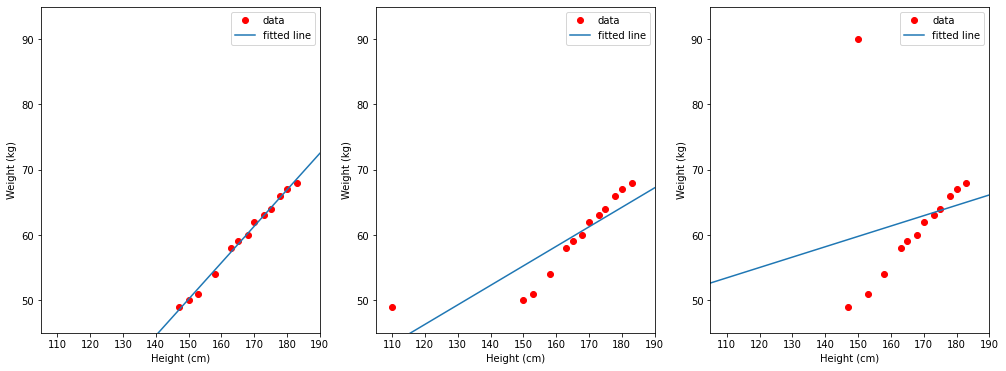

In [2]:
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression


def fit_linear_regression_and_visualize(
    df: pd.DataFrame, input_col: str, label_col: str
):
    # fit the model by Linear Regression
    lin_reg = LinearRegression(fit_intercept=True)
    lin_reg.fit(df[[input_col]], df[label_col])
    w1 = lin_reg.coef_
    w0 = lin_reg.intercept_

    # visualize
    plt.plot(df[input_col], df[label_col], "ro", label="data")
    plt.axis([105, 190, 45, 75])
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.ylim(45, 95)
    plt.plot([105, 190], [w1 * 105 + w0, w1 * 190 + w0], label="fitted line")
    plt.legend()


plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 1)
fit_linear_regression_and_visualize(df, input_col="height", label_col="weight")

plt.subplot(1, 3, 2)
fit_linear_regression_and_visualize(df, input_col="height_2", label_col="weight")

plt.subplot(1, 3, 3)
fit_linear_regression_and_visualize(df, input_col="height", label_col="weight_2")

In [3]:
import pandas as pd

df = pd.read_csv("../data/california_housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


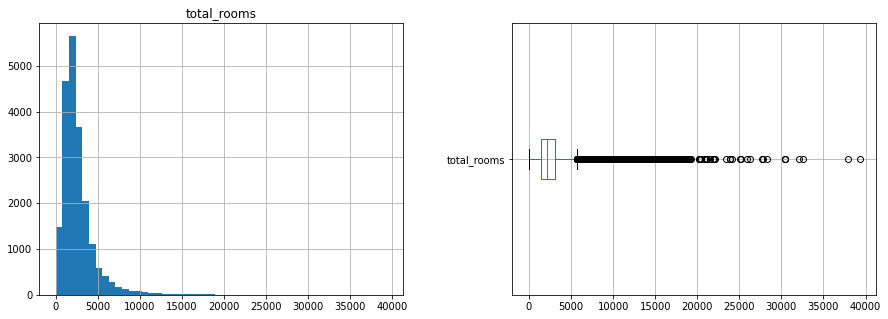

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["total_rooms"]].hist(bins=50, ax=axes[0]);
df[["total_rooms"]].boxplot(ax=axes[1], vert=False);

In [5]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: int = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

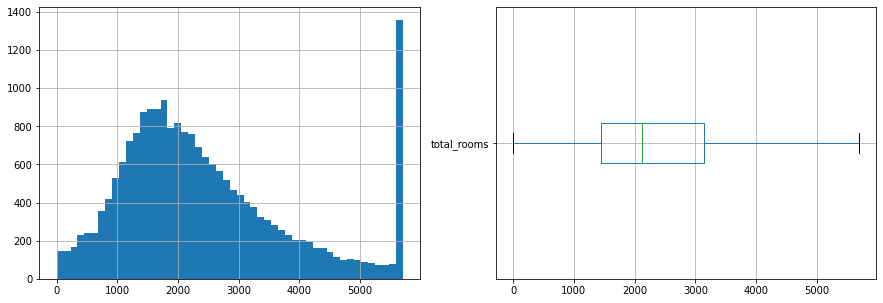

In [6]:
clipped_total_rooms = BoxplotOutlierRemover().fit_transform(df["total_rooms"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);